In [161]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pylab as plt
import seaborn as sns
import json
import os
import twitter
s = json.load(open(os.getenv('PUI2015')+'/nk1877.json'));
plt.rcParams.update(s)
#import Psycopg
% pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [134]:
with open('../Tweet_credentials.txt') as f:
    content = f.readlines()

In [156]:
m=[]
for i in content:
    m.append(i.split('=')[1].split(',')[0].strip("'"))

In [158]:
api = twitter.Api(consumer_key=m[0],
                      consumer_secret=m[1],
                      access_token_key=m[2],
                      access_token_secret=m[3])

In [111]:
## Generates and returns data frame from the aap tweet. Their tweet follows a rule which could be generalized for coding
##purpose
def dfcreater(aap):
    import re
    delimit=[]
    for i in aap:
        delimit.append(re.split(r'\b(From|Rs|With|On)\b', i))#[1].split('With')
    l=['Name','From','City','Rs','Rupees','With','Txn','on','Date']
    df=pd.DataFrame()
    for j,m in enumerate(l):
        k=[]
        for i in delimit:
            k.append(i[j])
        df[''+m]=k
    return df

In [71]:
df=df.drop(['From','Rs','With','on'],1)

In [107]:
#set mx as id of latest tweet. It would continue updating and appending tweets in aap1
aap1=[]
mx=762685546535813120
for i in range(12): ## Twitter daily limit is 2400. Therefore 12*200 interations would scrape 2400 tweets
    statuses1 = api.GetUserTimeline(2475173930,count=200,max_id=mx) #max 200 tweets could be fetched at a time
    for s in statuses1:
        aap1.append(s.text)
    mx=statuses1[199].id

In [112]:
dfnew=dfcreater(aap1)

In [123]:
dfnew=dfnew.drop(['From','Rs','With','on'],1)

In [130]:
dfnew=dfnew.drop_duplicates()

In [172]:
def citycleaner(x):
    if(x.find('INDIA')!=-1):
        return x.split('(')[0]
    else:
        return x.strip(' For Donating')
dfnew['City']=dfnew.City.apply(citycleaner,1)

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [178]:
dfnew['Rupees']=dfnew.Rupees.astype(int)

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [234]:
dfnew.shape

(2190, 5)

In [182]:
aap_city=dfnew.groupby('City').sum().reset_index()

In [190]:
aap_city=aap_city.sort('Rupees')


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


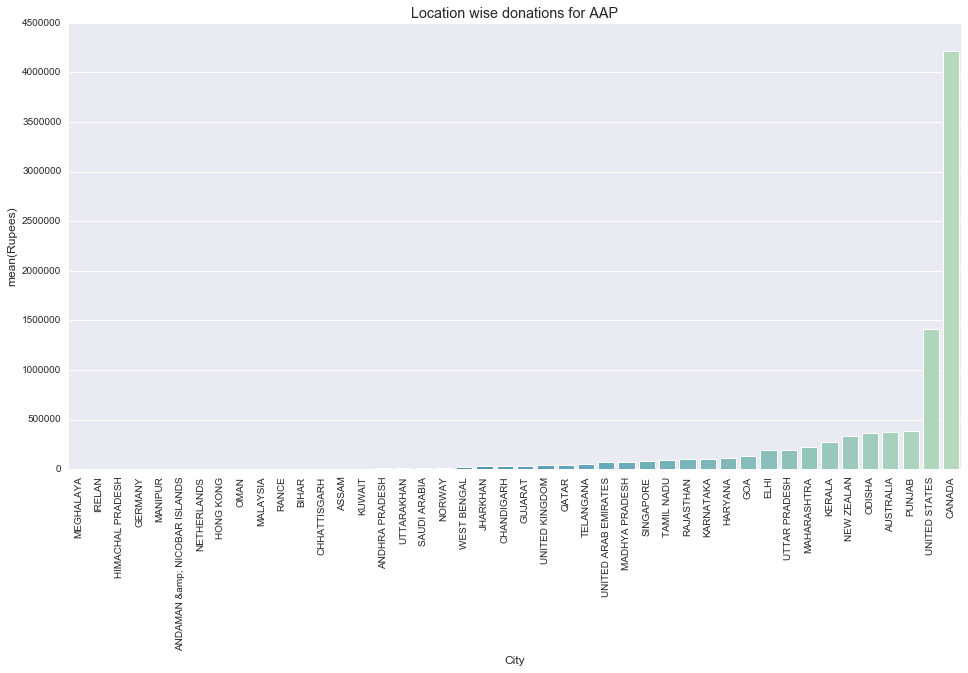

In [235]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
sns.barplot(x='City',y='Rupees',data=aap_city,palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Location wise donations for AAP")

In [233]:
## Accessing BJP Data from BJP website

In [201]:
bjp=pd.read_csv("Bharatiya-Janata-Party-All-Years.csv")

In [221]:
## Scraping states is too much work. Lets visualize donors.

In [209]:
bjp=bjp[['Name','Address','PAN Given','Amount','Contribution Mode','Financial Year ']]

In [224]:
bjp.shape

(8786, 6)

In [229]:
bjpnames=bjp.groupby('Name').sum().reset_index().sort('Amount',ascending=False).iloc[:50]

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [223]:
bjp.groupby('Name').sum().reset_index().sort('Amount',ascending=False).shape

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


(7699, 2)

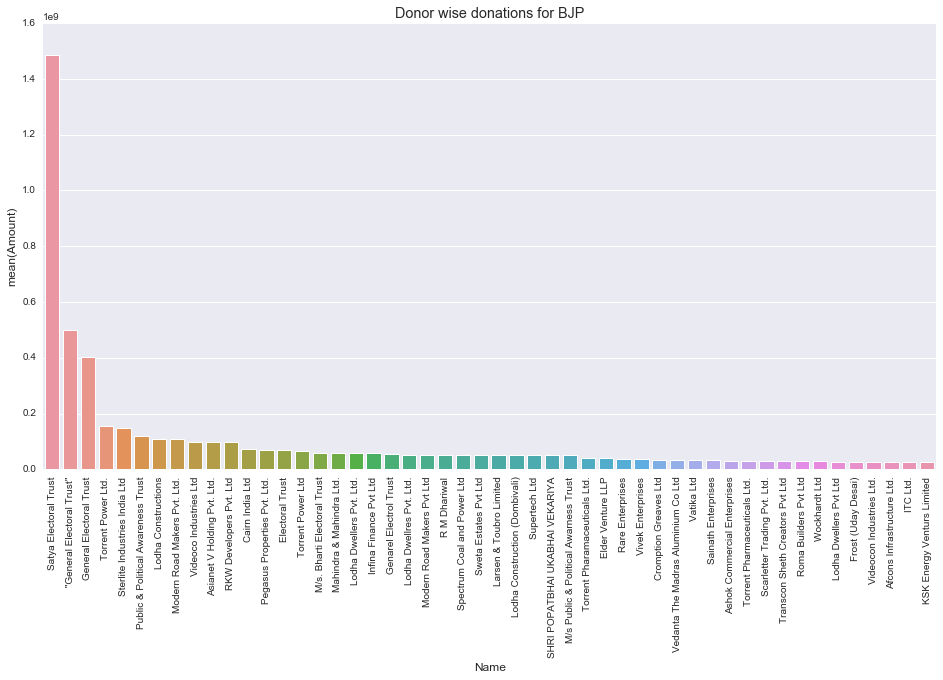

In [236]:
plt.figure(figsize=(16,8))
sns.barplot(x='Name',y='Amount',data=bjpnames)
plt.xticks(rotation=90)
plt.title("Donor wise donations for BJP")